**Porocilo**

In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore", category=pd.errors.DtypeWarning)

df_homicides = pd.read_csv(".\\files\\USA_homicides\\USA_homicides_processed.csv")
df_guns = pd.read_csv('.\\files\\guns_per_capita.csv', header=0)


**zadaca 5**

circumstance

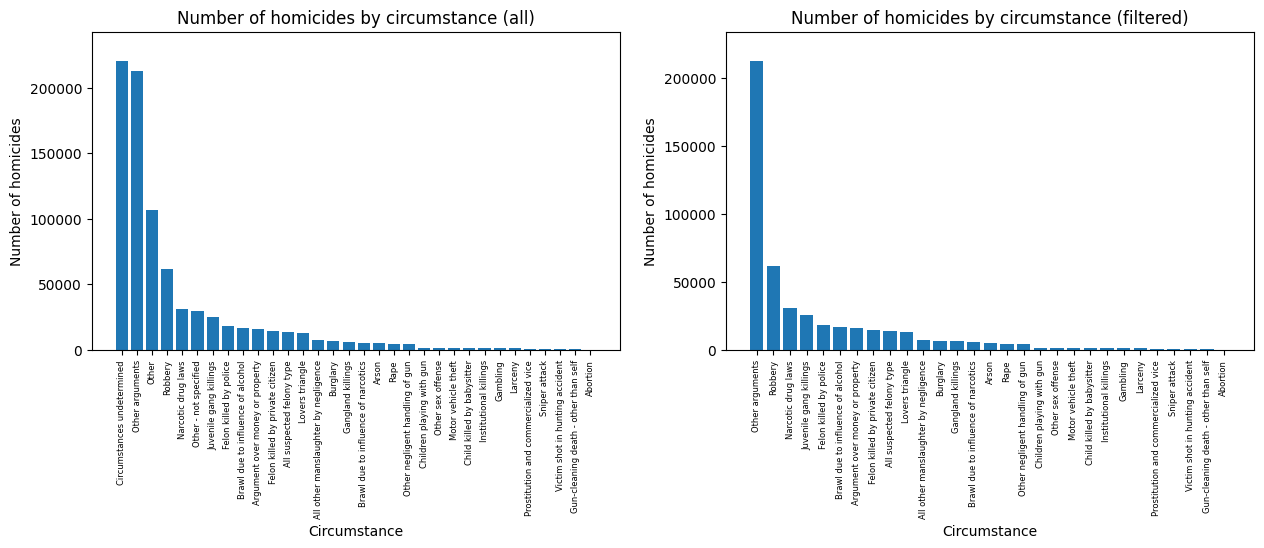

In [2]:
warnings.filterwarnings("ignore", category=UserWarning)

circumstance_counts_all = df_homicides.groupby('Circumstance')['Homicide'].count().sort_values(ascending=False)
circumstance_counts_filtered = circumstance_counts_all.drop(['Other', 'Other - not specified', 'Circumstances undetermined'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axs[0].bar(circumstance_counts_all.index, circumstance_counts_all.values)
axs[0].set_xticklabels(circumstance_counts_all.index, rotation=90, fontsize=6)
axs[0].set_xlabel('Circumstance')
axs[0].set_ylabel('Number of homicides')
axs[0].set_title('Number of homicides by circumstance (all)')
axs[0].set_ylim([0, max(circumstance_counts_all.values) * 1.1])

axs[1].bar(circumstance_counts_filtered.index, circumstance_counts_filtered.values)
axs[1].set_xticklabels(circumstance_counts_filtered.index, rotation=90, fontsize=6)
axs[1].set_xlabel('Circumstance')
axs[1].set_ylabel('Number of homicides')
axs[1].set_title('Number of homicides by circumstance (filtered)')
axs[1].set_ylim([0, max(circumstance_counts_filtered.values) * 1.1])

plt.subplots_adjust(bottom=0.35)
plt.show()

relationship

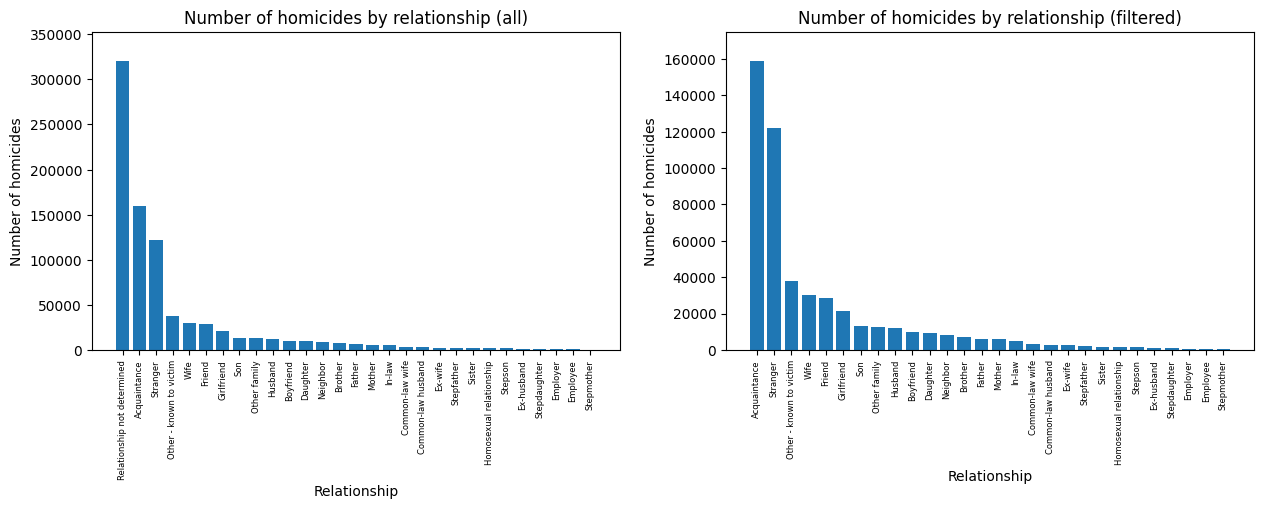

In [3]:
relationship_counts = df_homicides.groupby('Relationship')['Homicide'].count().sort_values(ascending=False)
relationship_counts_filtered = relationship_counts.drop(['Relationship not determined'])

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

axs[0].bar(relationship_counts.index, relationship_counts.values)
axs[0].set_xticklabels(relationship_counts.index, rotation=90, fontsize=6)
axs[0].set_xlabel('Relationship')
axs[0].set_ylabel('Number of homicides')
axs[0].set_title('Number of homicides by relationship (all)')
axs[0].set_ylim([0, max(relationship_counts.values) * 1.1])

axs[1].bar(relationship_counts_filtered.index, relationship_counts_filtered.values)
axs[1].set_xticklabels(relationship_counts_filtered.index, rotation=90, fontsize=6)
axs[1].set_xlabel('Relationship')
axs[1].set_ylabel('Number of homicides')
axs[1].set_title('Number of homicides by relationship (filtered)')
axs[1].set_ylim([0, max(relationship_counts_filtered.values) * 1.1])

plt.subplots_adjust(bottom=0.35)
plt.show()

plus

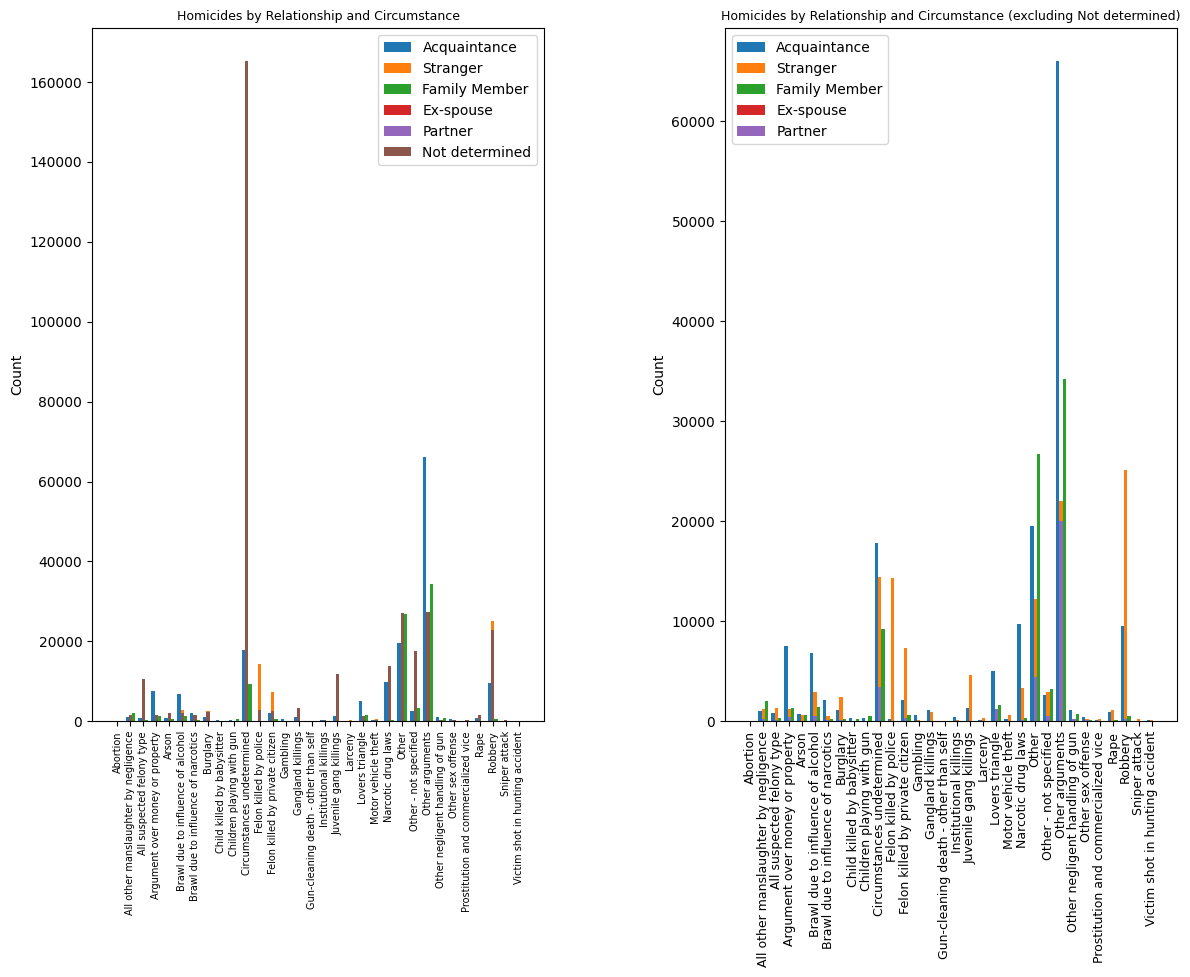

In [4]:
import numpy as np

circumstance_relationship_count = df_homicides.groupby(['Circumstance', 'Relationship'])['Relationship'].count().unstack()
circumstance_relationship_count['Family_member'] = circumstance_relationship_count[['Brother', 'Sister','Common-law husband','Common-law wife', 'Daughter', 'Other family','Son', 'Stepdaughter','Stepfather','Stepmother','Stepson','Wife']].sum(axis=1)
circumstance_relationship_count['Acquaintance'] = circumstance_relationship_count[['Acquaintance', 'Employee', 'Employer']].sum(axis=1)
circumstance_relationship_count['Ex-spouse'] = circumstance_relationship_count[['Ex-wife', 'Ex-husband']].sum(axis=1)
circumstance_relationship_count['Partner'] = circumstance_relationship_count[['Boyfriend', 'Girlfriend', 'Homosexual relationship']].sum(axis=1)

labels = circumstance_relationship_count.index
x = np.arange(len(labels))
width = 0.25

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14, 9))
fig.subplots_adjust(wspace=0.4)

rects1 = ax1.bar(x - width, circumstance_relationship_count['Acquaintance'], width, label='Acquaintance')
rects2 = ax1.bar(x, circumstance_relationship_count['Stranger'], width, label='Stranger')
rects3 = ax1.bar(x + width, circumstance_relationship_count['Family_member'], width, label='Family Member')
rects4 = ax1.bar(x, circumstance_relationship_count['Ex-spouse'], width, label='Ex-spouse')
rects5 = ax1.bar(x, circumstance_relationship_count['Partner'], width, label='Partner')
rects6 = ax1.bar(x, circumstance_relationship_count['Relationship not determined'], width, label='Not determined')
ax1.set_ylabel('Count')
ax1.set_title('Homicides by Relationship and Circumstance',fontsize=9)
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=90,fontsize=7)
ax1.legend()

rects1 = ax2.bar(x - width, circumstance_relationship_count['Acquaintance'], width, label='Acquaintance')
rects2 = ax2.bar(x, circumstance_relationship_count['Stranger'], width, label='Stranger')
rects3 = ax2.bar(x + width, circumstance_relationship_count['Family_member'], width, label='Family Member')
rects4 = ax2.bar(x, circumstance_relationship_count['Ex-spouse'], width, label='Ex-spouse')
rects5 = ax2.bar(x, circumstance_relationship_count['Partner'], width, label='Partner')
ax2.set_ylabel('Count')
ax2.set_title('Homicides by Relationship and Circumstance (excluding Not determined)', fontsize=9)
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=90,fontsize=9)
ax2.legend()

plt.show()